## Workflow
### Data > Data preprocessing > Anaylis > Train Test > LinearcRegression> New Data

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analytsis

In [2]:
# loading data from csv file to a pandas DataFrame
insurance_dataset = pd.read_csv("ML_Project11_MedicalInsurance.csv")

In [3]:
# print first 5 rows of data
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check rows and columns number
insurance_dataset.shape

(1338, 7)

In [5]:
# get info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


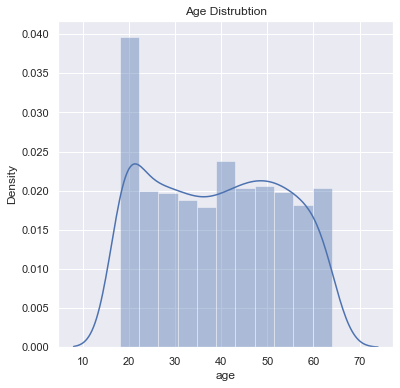

In [7]:
# checking the distrubtion of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset[("age")])
plt.title("Age Distrubtion")
plt.show()

# lot of data in the age of 20s

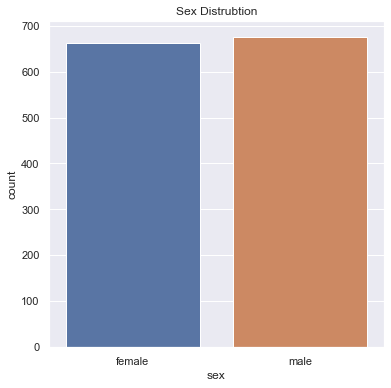

In [8]:
# COUNT PLOT (sex is categorial value)
# checking the distrubtion of the sex value. We cannot do it with categorial values, so use the count
plt.figure(figsize=(6,6))
sns.countplot(x ="sex" , data=insurance_dataset)
plt.title("Sex Distrubtion")
plt.show()

# same data for both values

In [9]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


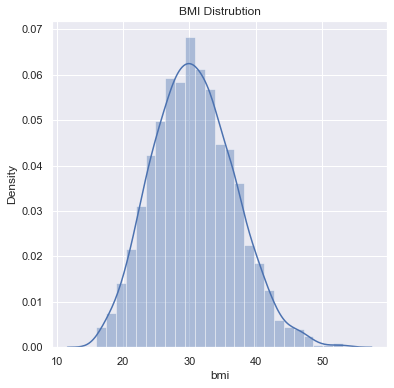

In [10]:
# DISTRUBUTION PLOT (dsitplot)
# checking the distrubtion of the BMI value. No categorical data, so no problem! 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset[("bmi")])
plt.title("BMI Distrubtion")
plt.show()

# lot of data in the age of 30s!. Normal BMI -- > 18,5 - 24,9

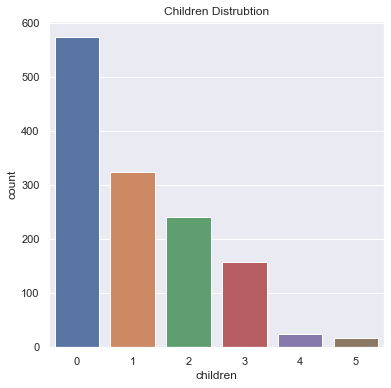

In [11]:
# COUNT PLOT
# checking the distrubtion of the sex value. We cannot do it with categorial values, so use the count
plt.figure(figsize=(6,6))
sns.countplot(x ="children" , data=insurance_dataset)
plt.title("Children Distrubtion")
plt.show()

# slots of data with no children!

In [12]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

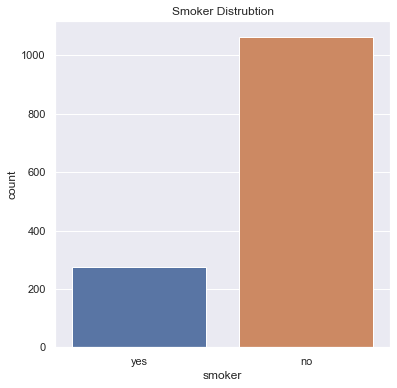

In [13]:
# COUNT PLOT
# checking the distrubtion of the sex value. We cannot do it with categorial values, so use the count
plt.figure(figsize=(6,6))
sns.countplot(x ="smoker" , data=insurance_dataset)
plt.title("Smoker Distrubtion")
plt.show()

# Non smoker beats

In [14]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

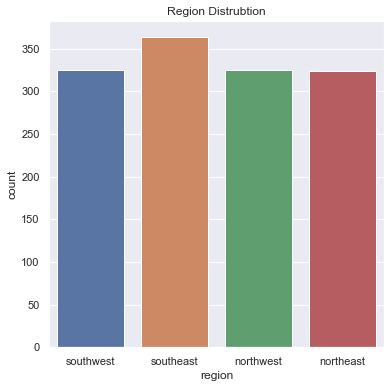

In [15]:
# COUNT PLOT
# checking the distrubtion of the sex value. We cannot do it with categorial values, so use the count
plt.figure(figsize=(6,6))
sns.countplot(x ="region" , data=insurance_dataset)
plt.title("Region Distrubtion")
plt.show()

# Non smoker beats

In [16]:
insurance_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


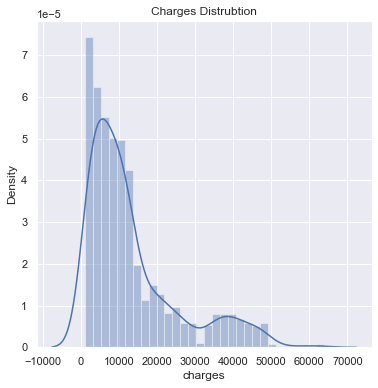

In [17]:
# DISTRUBUTION PLOT (dsitplot)
# checking the distrubtion of the BMI value. No categorical data, so no problem! 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset[("charges")])
plt.title("Charges Distrubtion")
plt.show()

## Categorial Data Label Encoding

In [18]:
le = LabelEncoder()

In [19]:
# getting all columns with objects on them
cat_columns = insurance_dataset.select_dtypes(include="object").columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
# Converting categorical data to numeric values
insurance_dataset[cat_columns] = insurance_dataset[cat_columns].apply(le.fit_transform)

In [21]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Splitting the Features and Target

In [39]:
X = insurance_dataset.drop("charges", axis=1)
y = insurance_dataset["charges"]

In [40]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Split Test Train Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Train the LinearRegression model

In [25]:
model = LinearRegression()

In [26]:
# train the model with train data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [31]:
# R squared value with train data
train_prediction = model.predict(X_train)
train_accuracy = metrics.r2_score(y_train, train_prediction)
print(f"Train accuracy is {(train_accuracy * 100):.2f}%")

Train accuracy is 75.20%


In [32]:
# R squared value with test data
test_prediction = model.predict(X_test)
test_accuracy = metrics.r2_score(y_test, test_prediction)
print(f"Test accuracy is {(test_accuracy * 100):.2f}%")

Test accuracy is 74.45%


## Build a predictive syustem

In [34]:
input_data = (11, 25, "male", 26.22,0, "no", "northeast")
# repeat the enconding process with transform (and NOT FIT)

In [41]:
input_data = (25, 1, 26.22,0, 0, 3)

In [42]:
# input data (tuple) to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [43]:
# reshape since we are predicting on one value
data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [44]:
prediction = model.predict(data_reshaped)

C:\Users\Javier\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
print(f"The insurance is USD {prediction[0]:.2f}")

The insurance is USD 2202.95
